In [11]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd
%load_ext rpy2.ipython
%R require(WaveletComp)
%R require(tidyverse)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array([1], dtype=int32)

In [4]:
###########################
# get onsets per unit time
##########################
def get_onsets_time(onsets,name_):
    BIN_SIZE = 0.01 # seconds
    onsets['time_bin'] = (onsets['time']/BIN_SIZE).astype('int')
    
    time = np.arange(BIN_SIZE,max(onsets['time'])+BIN_SIZE,BIN_SIZE)
    is_onsets = [0]*len(time)
    for i in range(len(onsets)):
        bin_num = int(onsets.iloc[i]['time_bin'])
        is_onsets[bin_num] = 1

    onsets_time = pd.DataFrame({'time': time,
                                'onsets': is_onsets,
                                'name': name_})
    return onsets_time 

In [5]:
# load data
a1_onsets = pd.read_csv('../Pipeline/onsets/t1.a1b1.a1.csv')
b1_onsets = pd.read_csv('../Pipeline/onsets/t1.a1b1.b1.csv')

In [13]:
a1_otime = get_onsets_time(a1_onsets,"a1")
b1_otime = get_onsets_time(b1_onsets,"b1")
a1b1 = pd.concat((a1_otime,b1_otime))
a1b1 = a1b1.pivot(columns='name', values='onsets').fillna(0)
name = "hi"

In [ ]:
%%R -i name -i a1b1
print(name)
wc <- analyze.coherency(a1b1, my.pair = c("a1","b1"),
                        loess.span = 0,
                        dt = 1, dj = 1/10,
                        lowerPeriod = 7,
                        upperPeriod = 375,
                        make.pval = FALSE)

save(wc, file = "../Pipeline/wavelet/a1b1-wavelet.dat")

[1] "hi"
Starting wavelet transformation and coherency computation...


In [51]:
coupled_wc = dict(zip(coupled_wc.names,list(coupled_wc)))

AttributeError: 'dict' object has no attribute 'names'

In [78]:
max(coupled_wc['Period'])

363.8890735675935

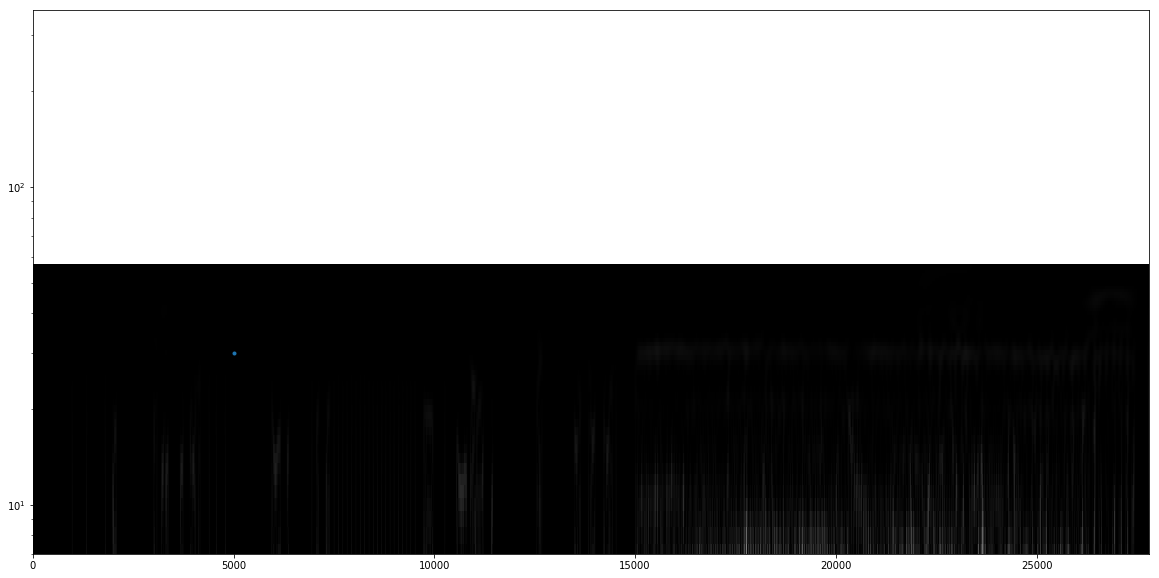

In [79]:
# Display matrix
plt.figure(figsize=[20,10])
plt.gca().invert_yaxis()
plt.yscale('log')
plt.ylim(7,360)
plt.plot([5000],[30],'.')
plt.imshow(power,cmap="gray",aspect='auto')

plt.show()

In [70]:
power_df = pd.DataFrame(np.transpose(power))

In [71]:
power_df.columns = bpm

,857.1428571428571,799.7425641744064,746.1861971109635,696.2163397339161,649.5928142187421,606.0915267313264,565.5033903312403,527.6333200049642,492.2992949987293,459.3314839441256,...,28.70821774650785,26.785714285714285,24.99195513045019,23.318318659717608,21.75676061668487,20.299775444335683,18.94036021035395,17.671980947851257,16.48854125015513,time
0,0.000702,0.000696,0.000692,0.000688,0.000684,0.000681,0.000678,0.000676,0.000674,0.000672,...,0.000661,0.000661,0.000661,0.000662,0.000661,0.000659,0.00066,0.000668,0.000671,0.01
1,0.000670,0.000669,0.000668,0.000667,0.000666,0.000666,0.000665,0.000664,0.000664,0.000664,...,0.000661,0.000661,0.000661,0.000661,0.000661,0.000659,0.00066,0.000668,0.000672,0.02
2,0.000611,0.000617,0.000623,0.000627,0.000632,0.000635,0.000639,0.000642,0.000644,0.000646,...,0.000661,0.000661,0.000661,0.000661,0.000661,0.000659,0.00066,0.000668,0.000672,0.03
3,0.000532,0.000547,0.000560,0.000572,0.000583,0.000593,0.000601,0.000609,0.000615,0.000621,...,0.000661,0.000661,0.000661,0.000661,0.000661,0.000659,0.00066,0.000668,0.000672,0.04
4,0.000442,0.000465,0.000487,0.000507,0.000524,0.000540,0.000555,0.000567,0.000579,0.000589,...,0.000661,0.000661,0.000661,0.000661,0.000661,0.000659,0.00066,0.000668,0.000672,0.05


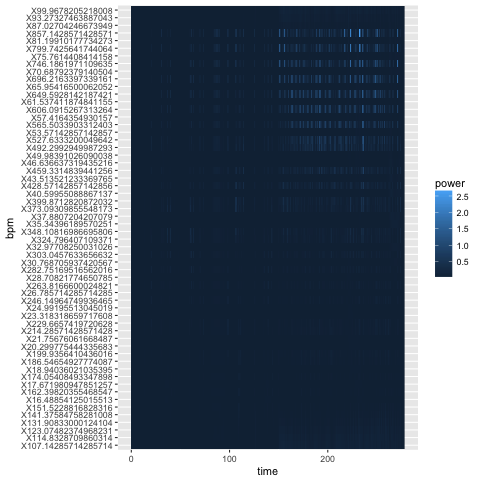

In [77]:
%%R -i power_df

power_df_long = power_df %>% gather(bpm,power,-time)
head(power_df_long)

ggplot(power_df_long, aes(x=time,y=bpm)) +
    geom_tile(aes(fill=power))

In [ ]:
power_df_long.to_csv()